# Getting the data

In [1]:

file_1 = 'data/products_df.csv'
file_2 = 'data/commercial_activity_df.csv'
file_3 = 'data/sociodemographic_df.csv'

# Importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Taking a look at the data

In [4]:
df_com_act = pd.read_csv(file_2)
df_products = pd.read_csv(file_1)
df_sociodem = pd.read_csv(file_3)

## Commercial activity

* pk_cid: Client ID
* pk_partition: Data ingestion date
* entry_date: Date of first contract through easyMoney
* entry_channel: Customer acquisition channel
* active_customer: Customer activity indicator in our app
* segment: Customer commercial segment

In [5]:
df_com_act.head()

,Unnamed: 0,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1,1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
2,2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
3,3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO
4,4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO


In [6]:
df_com_act.shape

(5962924, 7)

In [7]:
# deleting index column
df_com_act=df_com_act.drop('Unnamed: 0', axis=1)

## Products

* pk_cid: Customer identifier
* pk_partition: Data ingestion date
* short_term_deposit
* loans
* mortgage
* funds: Investment funds
* securities
* long_term_deposit
* em_account_p: EasyMoney+ account
* em_account_pp: EasyMoney++ account
* em_acount: EasyMoney account
* emc_account: EasyMoney Crypto account
* credit_card
* pay_roll
* pension_plan
* pay_roll_account
* debit_card

In [8]:
df_products.head()

,Unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [9]:
df_products.shape

(5962924, 18)

In [10]:
# dropping index col
df_products=df_products.drop('Unnamed: 0', axis=1)

## Sociodemographic

In [11]:
df_sociodem.head()

,Unnamed: 0,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,0,1375586,2018-01-28,ES,29.0,H,35,N,87218.10
1,1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74
2,2,1050612,2018-01-28,ES,13.0,V,23,N,122179.11
3,3,1050613,2018-01-28,ES,50.0,H,22,N,119775.54
4,4,1050614,2018-01-28,ES,50.0,V,23,N,NaN


In [12]:
df_sociodem.shape

(5962924, 9)

In [13]:
# dropping index column
df_sociodem=df_sociodem.drop('Unnamed: 0', axis=1)

## Merging datasets

Since both have the same # of rows, we'll join by common cols: pk_cid y pk_partition

In [14]:
df_products.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [15]:
df=df_com_act.merge(df_products, how='left', on=['pk_cid', 'pk_partition'])\
            .merge(df_sociodem, how='left', on=['pk_cid', 'pk_partition'])

In [16]:
df.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,29.0,H,35,N,87218.10
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,13.0,V,23,N,35548.74
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,13.0,V,23,N,122179.11
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,ES,50.0,H,22,N,119775.54
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,50.0,V,23,N,NaN


# Data cleaning

## Variables with nulls

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   entry_date          object 
 3   entry_channel       object 
 4   active_customer     float64
 5   segment             object 
 6   short_term_deposit  int64  
 7   loans               int64  
 8   mortgage            int64  
 9   funds               int64  
 10  securities          int64  
 11  long_term_deposit   int64  
 12  em_account_pp       int64  
 13  credit_card         int64  
 14  payroll             float64
 15  pension_plan        float64
 16  payroll_account     int64  
 17  emc_account         int64  
 18  debit_card          int64  
 19  em_account_p        int64  
 20  em_acount           int64  
 21  country_id          object 
 22  region_code         float64
 23  gender              object 
 24  age                 int6

In [18]:
df.isna().sum()

pk_cid                      0
pk_partition                0
entry_date                  0
entry_channel          133033
active_customer             0
segment                133944
short_term_deposit          0
loans                       0
mortgage                    0
funds                       0
securities                  0
long_term_deposit           0
em_account_pp               0
credit_card                 0
payroll                    61
pension_plan               61
payroll_account             0
emc_account                 0
debit_card                  0
em_account_p                0
em_acount                   0
country_id                  0
region_code              2264
gender                     25
age                         0
deceased                    0
salary                1512103
dtype: int64

### Variable region code

I've mapped the regions with the code that's associated to the Spanish region, and for nulls I've used `999:Unknown`

In [19]:
df.region_code.max()

52.0

In [20]:
df.region_code.min()

1.0

In [21]:
df.country_id.value_counts()

country_id
ES    5960672
GB        441
FR        225
DE        199
US        195
CH        194
BR         87
BE         81
VE         79
IE         68
MX         58
AT         51
AR         51
PL         49
IT         45
MA         34
CL         30
CN         28
CA         22
LU         17
ET         17
QA         17
CI         17
SA         17
CM         17
SN         17
MR         17
NO         17
RU         17
CO         17
GA         17
GT         17
DO         17
SE         16
DJ         11
PT         11
JM         11
RO          9
HU          8
DZ          7
PE          4
Name: count, dtype: int64

In [22]:
df['region_code']=np.where(df['region_code'].isna(),999,df['region_code'])

In [23]:
# making sure there are no nulls + changing variable type to categorical 
#(so the future model does not interpret it as a #)
df.region_code.isna().any()
df['region_code']=df.region_code.astype('category')

In [24]:
# Creating an additional col that contains the values of the Spanish regions
regions={1:'Alava',
2:'Albacete',
3:'Alicante',
4:'Almeria',
5:'Avila',
6:'Badajoz',
7:'Baleares',
8:'Barcelona',
9:'Burgos',
10:'Caceres',
11:'Cadiz',
12:'Castellon',
13:'Ciudad Real',
14:'Cordoba',
15:'La Coruna',
16:'Cuenca',
17:'Gerona',
18:'Granada',
19:'Guadalajara',
20:'Guipuzcoa',
21:'Huelva',
22:'Huesca',
23:'Jaen',
24:'Leon',
25:'Lerida',
26:'La Rioja',
27:'Lugo',
28:'Madrid',
29:'Malaga',
30:'Murcia',
31:'Navarra',
32:'Orense',
33:'Asturias',
34:'Palencia',
35:'Las Palmas',
36:'Pontevedra',
37:'Salamanca',
38:'Santa Cruz de Tenerife',
39:'Cantabria',
40:'Segovia',
41:'Sevilla',
42:'Soria',
43:'Tarragona',
44:'Teruel',
45:'Toledo',
46:'Valencia',
47:'Valladolid',
48:'Vizcaya',
49:'Zamora',
50:'Zaragoza',
51:'Ceuta',
52:'Melilla',
999:'Desconocido'}

df['region_name']=df.region_code.map(regions)

### Variable deceased

Converting variable to 1 if deceased and 0 otherwise (taking into account that there are no nulls).

In [25]:
df.deceased.value_counts()

deceased
N    5961849
S       1075
Name: count, dtype: int64

In [26]:
df['deceased']=np.where(df['deceased']=='N',0,1)

### Variable gender

In [27]:
df['gender']=np.where(df['gender'].isna(),'unknown',df['gender'])

In [28]:
df.gender.value_counts(normalize=True) #muy bien distribuida en términos de género

gender
H          0.517783
V          0.482213
unknown    0.000004
Name: proportion, dtype: float64

### Variable segment

In [29]:
df.segment.value_counts()

segment
03 - UNIVERSITARIO    3900166
02 - PARTICULARES     1830875
01 - TOP                97939
Name: count, dtype: int64

In [30]:
df['segment']=np.where(df['segment']=='03 - UNIVERSITARIO','universitario',df['segment'])
df['segment']=np.where(df['segment']=='02 - PARTICULARES','particulares',df['segment'])
df['segment']=np.where(df['segment']=='01 - TOP','top',df['segment'])
df['segment']=np.where(df['segment'].isna(),'desconocido',df['segment'])

### Variable entry channel

In [31]:
df.entry_channel.value_counts()

entry_channel
KHE    3113947
KFC     890620
KHQ     590280
KAT     416084
KHK     230197
        ...   
KEJ          8
KHS          5
KDA          2
KFP          2
KDS          1
Name: count, Length: 68, dtype: int64

In [32]:
df.entry_channel.isna().sum()

133033

In [33]:
df['entry_channel']=np.where(df['entry_channel'].isna(),'UNKNOWN',df['entry_channel'])

In [34]:
df['entry_channel']=df.entry_channel.astype('category')

### Variable payroll

In [35]:
df.payroll.value_counts(normalize=True) # muy desbalanceado

payroll
0.0    0.965489
1.0    0.034511
Name: proportion, dtype: float64

In [36]:
df['payroll']=np.where(df['payroll'].isna(),0,df['payroll'])

### Variable pension_plan

In [37]:
df.pension_plan.value_counts(normalize=True)

pension_plan
0.0    0.963474
1.0    0.036526
Name: proportion, dtype: float64

In [38]:
df['pension_plan']=np.where(df['pension_plan'].isna(),0,df['pension_plan'])

### Variable salary

In [39]:
df.salary.describe()

count    4.450821e+06
mean     1.158167e+05
std      1.995519e+05
min      1.202730e+03
25%      6.150063e+04
50%      8.865465e+04
75%      1.316699e+05
max      2.889440e+07
Name: salary, dtype: float64

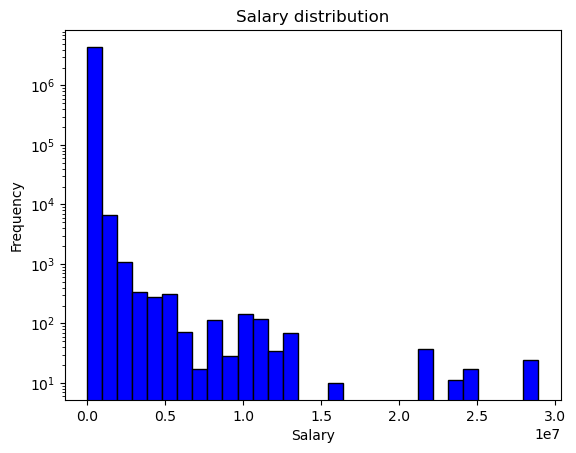

In [40]:
plt.hist(df['salary'], bins=30, color='blue', edgecolor='black',log=True)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary distribution')
plt.show()

In [41]:
df.query('salary<0')

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary,region_name


Creating a categorical variable to analyze the salary using quantiles.

In [42]:
cuantiles = df['salary'].describe(percentiles=[0.25, 0.5, 0.75])
cuantiles

count    4.450821e+06
mean     1.158167e+05
std      1.995519e+05
min      1.202730e+03
25%      6.150063e+04
50%      8.865465e+04
75%      1.316699e+05
max      2.889440e+07
Name: salary, dtype: float64

In [43]:
df.loc[ (df['salary'] <= 61500.63), 'salary_categ'  ]='low_salary'
df.loc[ (df['salary'] > 61500.63) & (df['salary'] <= 88654.65), 'salary_categ'  ]='medium_low_salary'
df.loc[ (df['salary'] >  88654.65) & (df['salary'] <= 131669.91), 'salary_categ'  ]='medium_high_salary'
df.loc[ (df['salary'] > 131669.91) , 'salary_categ'  ]='high_salary'
df.loc[ (df['salary'].isnull()) , 'salary_categ'  ]='unknown'

In [44]:
df.salary.fillna(-999, inplace=True)

In [45]:
clases=df.salary_categ.value_counts()

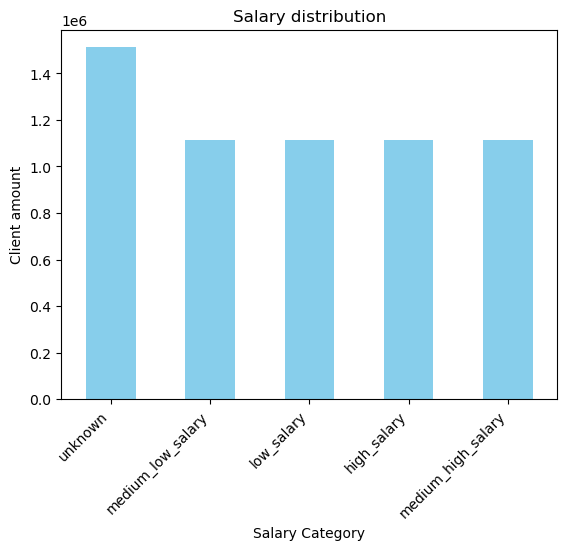

In [46]:
clases.plot(kind='bar', color='skyblue')
plt.xlabel('Salary Category')
plt.ylabel('Client amount')
plt.title('Salary distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

## Changing variable types

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 29 columns):
 #   Column              Dtype   
---  ------              -----   
 0   pk_cid              int64   
 1   pk_partition        object  
 2   entry_date          object  
 3   entry_channel       category
 4   active_customer     float64 
 5   segment             object  
 6   short_term_deposit  int64   
 7   loans               int64   
 8   mortgage            int64   
 9   funds               int64   
 10  securities          int64   
 11  long_term_deposit   int64   
 12  em_account_pp       int64   
 13  credit_card         int64   
 14  payroll             float64 
 15  pension_plan        float64 
 16  payroll_account     int64   
 17  emc_account         int64   
 18  debit_card          int64   
 19  em_account_p        int64   
 20  em_acount           int64   
 21  country_id          object  
 22  region_code         category
 23  gender              object  
 24

In [48]:
df['gender']=df.gender.astype('category')
df['segment']=df.segment.astype('category')
df['country_id']=df.country_id.astype('category')
df['pk_partition'] = pd.to_datetime(df['pk_partition'], format="%Y-%m-%d")

data= ['payroll','pension_plan','active_customer']
df[data]=df[data].astype('int64')

In [49]:
print(df.iloc[688])

pk_cid                            1051705
pk_partition          2018-01-28 00:00:00
entry_date                     2015-08-14
entry_channel                         KHD
active_customer                         0
segment                     universitario
short_term_deposit                      0
loans                                   0
mortgage                                0
funds                                   0
securities                              0
long_term_deposit                       0
em_account_pp                           0
credit_card                             0
payroll                                 0
pension_plan                            0
payroll_account                         0
emc_account                             0
debit_card                              0
em_account_p                            0
em_acount                               1
country_id                             ES
region_code                           6.0
gender                            

I can't convert the 'entry_date' column to datetime because of the column at position 688, but when I use iloc, there doesn't seem to be anything wrong. So, I replace the problematic values with NaN and create a new column with this information. Then, I locate the NaN values in that column and discover that it's because the 'entry_date' is February 29th. I replace it with March 1st and convert it to datetime.

In [50]:
df['entry_date_test'] = pd.to_datetime(df['entry_date'], format="%Y-%m-%d", errors='coerce')
problematic_rows = df[df['entry_date_test'].isna()]
problematic_rows.entry_date.value_counts()

entry_date
2019-02-29    4621
2015-02-29    1792
Name: count, dtype: int64

In [51]:
df['entry_date']=np.where(df['entry_date']=='2015-02-29','2015-03-01',df['entry_date'])
df['entry_date']=np.where(df['entry_date']=='2019-02-29','2019-03-01',df['entry_date'])
df.drop('entry_date_test', axis=1, inplace=True)

In [52]:
df['entry_date'] = pd.to_datetime(df['entry_date'], format="%Y-%m-%d")

# Creating variables of interest

## Monthly differences by product 

In [53]:
products=['loans', 'mortgage', 'funds', 'securities',
           'long_term_deposit', 'em_account_pp', 'credit_card',
           'payroll', 'pension_plan', 'payroll_account', 'emc_account',
           'debit_card', 'em_account_p', 'em_acount', 'short_term_deposit']

In [54]:
def diferencia_mensual_producto (df, product):
    df[product+'_pm']  = df.groupby('pk_cid')[product].shift(1)
    df['dif_'+product] = df[product] - df[product+'_pm']
    df.drop(product+'_pm',axis=1,inplace=True)

In [55]:
df_sorted = df.sort_values(by=['pk_cid', 'pk_partition'])

In [56]:
for p in products:
    diferencia_mensual_producto(df_sorted,p)

## Variable new client

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 29 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              int64         
 1   pk_partition        datetime64[ns]
 2   entry_date          datetime64[ns]
 3   entry_channel       category      
 4   active_customer     int64         
 5   segment             category      
 6   short_term_deposit  int64         
 7   loans               int64         
 8   mortgage            int64         
 9   funds               int64         
 10  securities          int64         
 11  long_term_deposit   int64         
 12  em_account_pp       int64         
 13  credit_card         int64         
 14  payroll             int64         
 15  pension_plan        int64         
 16  payroll_account     int64         
 17  emc_account         int64         
 18  debit_card          int64         
 19  em_account_p        int64         
 20  em

Creating a variable for new customers. The logic is as follows: if the data ingestion date or pk_partition (the moment when the product referenced in the entry is contracted) is after the first contract date or entry_date, the variable is set to 0. Otherwise, it's set to 1 (if both dates match, the entry refers to the first contract, and if the data ingestion date is before the first contract date, it's due to a difference of one or two days, likely because the pk_partition is only collected on the 28th of each month, so we'll consider it as new).

In [58]:
for i in ["pk_partition","entry_date"]:
    df_sorted[i]=pd.to_datetime(df_sorted[i], format='%Y-%m-%d')

In [59]:
# We do the subtraction of the position date with the entry date and we convert it in months
df_sorted['meses_alta']=(df_sorted['pk_partition']-df_sorted['entry_date'])/np.timedelta64(1,'M')

In [60]:
'''Since the data ingestion date always occurs on the 28th of the month, 
there will be customers with a negative subscription time because some customers 
will have entry_date on days between the 29th and the 31st.'''
len(df_sorted[df_sorted['meses_alta']<0])

11586

In [61]:
df_sorted[df_sorted['meses_alta']<0].agg({'em_acount':np.sum,
'loans':np.sum,
 'mortgage':np.sum,
 'funds':np.sum,
 'securities':np.sum,
 'long_term_deposit':np.sum,
 'em_account_pp':np.sum,
 'credit_card':np.sum,
 'payroll':np.sum,
 'pension_plan':np.sum,
 'payroll_account':np.sum,
 'emc_account':np.sum,
 'debit_card':np.sum,
 'em_account_p':np.sum,
 'em_acount':np.sum})

em_acount            931
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit     20
em_account_pp          0
credit_card            0
payroll                0
pension_plan           0
payroll_account       13
emc_account            0
debit_card             0
em_account_p           0
dtype: int64

In [62]:
df_sorted[df_sorted['meses_alta']<0]['meses_alta'].value_counts()

meses_alta
-0.032258    5103
-0.064516    4707
-0.096774    1776
Name: count, dtype: int64

In [63]:
df_sorted['new_client']=((df_sorted['meses_alta'] < 1) & 
                          (df_sorted['meses_alta'] > 0)).astype(int)

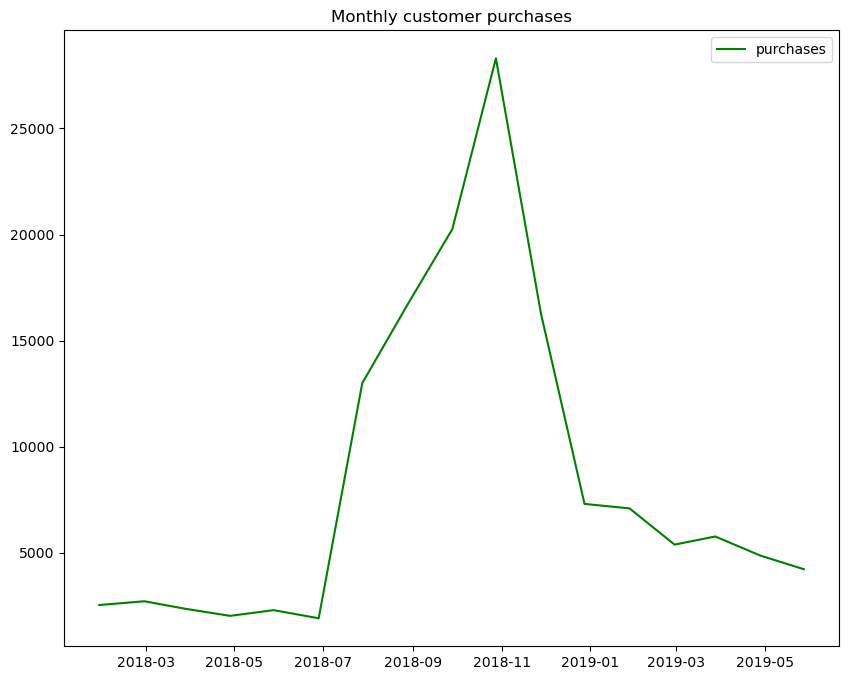

In [64]:
df_altas=df_sorted.groupby(['pk_partition'])['new_client'].sum()
fig = plt.figure(figsize = (10, 8))
plt.plot(df_altas, color = "green", label = "purchases")
plt.title("Monthly customer purchases")
plt.legend();

When calculating the differentials, the first records will be null. There are three possible scenarios:

- Old customers whose first record in the sample is 0 for all products: in this case, null would be equivalent to 0.
- Old customers whose first record is different from 0 for all products. Since we don't have any information prior to the sample, we can't assume these are sign-ups (they could be products that have been active for some time, and assigning a value different from 0 would distort the sample).
- New customers with values different from 0. In this case, as they are new customers, the products will be 100% sign-ups, so we will assign the value from the non-differential variable to the differential variable.

In [65]:
for x in products:
    df_sorted.loc[ (df_sorted['new_client']==1) &
                   (df_sorted['dif_'+x].isnull()==True), 
                  'dif_'+x]=df_sorted[x]

## Products bought by client

Creating a products dataframe with melt, converting the columns from the 'products' list into rows and creating 2 columns

In [66]:
df_products=df_sorted.melt(id_vars=['pk_partition','pk_cid'], value_vars=products, var_name='Producto', value_name='Count')

Adding quantities by clients for every date registered

In [67]:
df_products

,pk_partition,pk_cid,Producto,Count
0,2018-07-28,15891,loans,0
1,2018-08-28,15891,loans,0
2,2018-11-28,16063,loans,0
3,2018-12-28,16063,loans,0
4,2019-01-28,16063,loans,0
...,...,...,...,...
89443855,2019-05-28,1553685,short_term_deposit,0
89443856,2019-05-28,1553686,short_term_deposit,0
89443857,2019-05-28,1553687,short_term_deposit,0
89443858,2019-05-28,1553688,short_term_deposit,0


In [68]:
# grouping by 'pk_partition' y 'pk_cid', adding Qs ('Count')
df_products=df_products.groupby(['pk_partition','pk_cid']).agg({'Count':np.sum}).reset_index(drop=False)

In [69]:
df_products.rename(columns={'Count':'productos_totales'}, inplace=True)

In [70]:
df_sorted=pd.merge(df_sorted,df_products, how="inner",on=['pk_cid','pk_partition'])

## Monthly revenue

For new customers, since there are no previous values, we will have a NaN, but it is likely that they contracted products in that first entry, so we need to address it. I set it to 0 for everyone.

In [71]:
primeras_dif=['dif_debit_card',              
'dif_em_account_p',               
'dif_em_account_pp',              
'dif_em_acount',                  
'dif_emc_account',                
'dif_payroll',                   
'dif_payroll_account',            
'dif_funds',                      
'dif_long_term_deposit',         
'dif_mortgage',                   
'dif_pension_plan',               
'dif_securities',                
'dif_short_term_deposit',        
'dif_loans',                      
'dif_credit_card']  

In [72]:
df_ing=df_sorted.melt(id_vars=['pk_partition','pk_cid'],
              value_vars=primeras_dif,
              var_name='productos_totales',
              value_name='Count')

In [73]:
df_ing['Count'].value_counts()

Count
 0.0    84026250
 1.0      331059
-1.0      196041
Name: count, dtype: int64

In [74]:
# creating a df with purchases, since revenue is linked to those only
df_altas=df_ing[df_ing['Count']==1]

In [75]:
revenue={'dif_debit_card':10 ,              
'dif_em_account_p':10 ,               
'dif_em_account_pp':10 ,              
'dif_em_acount':10 ,                  
'dif_emc_account':10 ,                
'dif_payroll':10 ,                   
'dif_payroll_account':10 ,            
'dif_funds':40 ,                      
'dif_long_term_deposit':40 ,         
'dif_mortgage':40 ,                   
'dif_pension_plan':40 ,               
'dif_securities':40 ,                
'dif_short_term_deposit':40 ,        
'dif_loans':60 ,                      
'dif_credit_card':60 }

In [76]:
df_altas['ingresos_producto']=df_altas['productos_totales'].map(revenue)

/var/folders/v8/ttzsnn891fd42qm8ffd92scm0000gp/T/ipykernel_9834/1321733775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_altas['ingresos_producto']=df_altas['productos_totales'].map(revenue)


In [77]:
df_altas['ingresos']=df_altas['Count']*df_altas['ingresos_producto']

/var/folders/v8/ttzsnn891fd42qm8ffd92scm0000gp/T/ipykernel_9834/191210926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_altas['ingresos']=df_altas['Count']*df_altas['ingresos_producto']


In [78]:
clientes_ingresos=df_altas.groupby(['pk_partition','pk_cid'])\
    .agg({'ingresos_producto':np.sum}).reset_index(drop=False)

In [79]:
df_sorted =pd.merge(df_sorted , clientes_ingresos, 
                    how="left",on=['pk_cid','pk_partition'])

In [80]:
df_sorted['ingresos_producto'].fillna(0,inplace=True)

In [82]:
for p in products:
    df_sorted.loc[ (df_sorted['new_client']==1) &
                   (df_sorted['dif_'+p].isnull()==True), 
                  'dif_'+p]=df_sorted[p]

In [83]:
for p in products:
    df_sorted.loc[ (df_sorted['new_client']==0) &
                   (df_sorted['dif_'+p].isnull()==True), 
                  'dif_'+p]=0

In [84]:
df_sorted['ingresos_producto'].describe()

count    5.962924e+06
mean     8.932346e-01
std      5.679151e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.500000e+02
Name: ingresos_producto, dtype: float64

## Inactive customers

Some customers have not purchased anything during the whole studied period, so we'll designate those as inactive.

In [85]:
df.query('pk_cid==16063') #example

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary,region_name,salary_categ
2962973,16063,2018-11-28,2018-11-19,KAT,1,desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,unknown
3628236,16063,2018-12-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,unknown
4028169,16063,2019-01-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,unknown
4480637,16063,2019-02-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,unknown
4876040,16063,2019-03-28,2018-11-19,KAT,0,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,unknown
5134317,16063,2019-04-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,unknown
5523397,16063,2019-05-28,2018-11-19,KAT,0,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,unknown


In [86]:
products_by_client = df_sorted.groupby('pk_cid')['productos_totales'].sum().reset_index()
products_by_client = products_by_client.rename(columns={'productos_totales': 'suma_productos_totales'})

df_sorted = pd.merge(df_sorted, products_by_client, on='pk_cid', how='left')

# creating a binary variable for active-inactive
df_sorted['cliente_activo'] = np.where(df_sorted['suma_productos_totales'] == 0, 0, 1)
df_ordenado = df_sorted.drop(columns=['suma_productos_totales'])

Saving as pickle to save up space.

In [87]:
df_sorted.to_pickle('EasyMoney_base.pkl', compression='zip')